In [ ]:
import pandas as pd

## **SPAM Classification** 

Text Classification -

In this project, we use SMS Spam dataset by UCI ML Repository to perform text classification i.e. into spam or ham - build a model that accurately predicts which SMS messages are spam. We use NLP Techniques to classify the data.



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
#Loading the csv dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['spam.csv']),encoding = "ISO-8859-1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#Dropping unnecessary columns
df.dropna(how="any", inplace=True, axis=1)

In [ ]:
#Labeling the columns or attributes
df.columns=['Label','SMS']

# **Dataset**

The dataset has 5574 text messages that have been classified as SPAM or HAM. Each row has 2 columns, a message and its label. 

In [ ]:
df.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Adding a numerical variable i.e. 0 or 1 for ham or spam respectively. 
df['Label_number']=''
df.head()

,Label,SMS,Label_number
0,ham,"Go until jurong point, crazy.. Available only ...",
1,ham,Ok lar... Joking wif u oni...,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,
3,ham,U dun say so early hor... U c already then say...,
4,ham,"Nah I don't think he goes to usf, he lives aro...",


In [ ]:
#Iteratively adding the label number 
for i in range(len(df)):
  if df.Label.iloc[i]=='ham':
    df.Label_number.iloc[i]=0
  else:
    df.Label_number.iloc[i]=1

In [ ]:
df.head()

,Label,SMS,Label_number
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df['Label_number']=df['Label_number'].astype(int)

## **Exploratory Data Analysis**

In [ ]:
df.dtypes

Label           object
SMS             object
Label_number     int64
dtype: object

In [ ]:
#Dimensions of the dataset
df.shape

(5572, 3)

In [ ]:
#Description of the label number in the dataset
df.describe()

,Label_number
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
#Number of Ham and Spam Messages. 
df['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

As we can see, the dataset is not balanced. We have more HAM Messages than Spam messages - Data Imbalance. 

In [ ]:
#We have 4825 ham messages and 747 spam messages
df.groupby('Label_number').describe()

Label                      SMS         \
             count unique   top  freq count unique   
Label_number                                         
0             4825      1   ham  4825  4825   4516   
1              747      1  spam   747   747    653   

                                                                      
                                                            top freq  
Label_number                                                          
0                                        Sorry, I'll call later   30  
1             Please call our customer service representativ...    4

In [ ]:
#Analyzing the length of each message
df['length']=''
for i in range(len(df)):
  df.length.iloc[i]=int(len(df.SMS.iloc[i]))

In [ ]:
df['length']=df['length'].astype(int)

In [ ]:
df.head()

,Label,SMS,Label_number,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [ ]:
#Separating all Ham messages into one datatframe 
dfham = df[df['Label']=='ham']

In [ ]:
#Separating all Spam messages into one datatframe 
dfspam = df[df['Label']=='spam']

In [ ]:
#Putting all ham messages into a list and convert it into a string
ham_sms = " ".join(dfham.SMS.to_numpy().tolist())

# **WordClouds** 

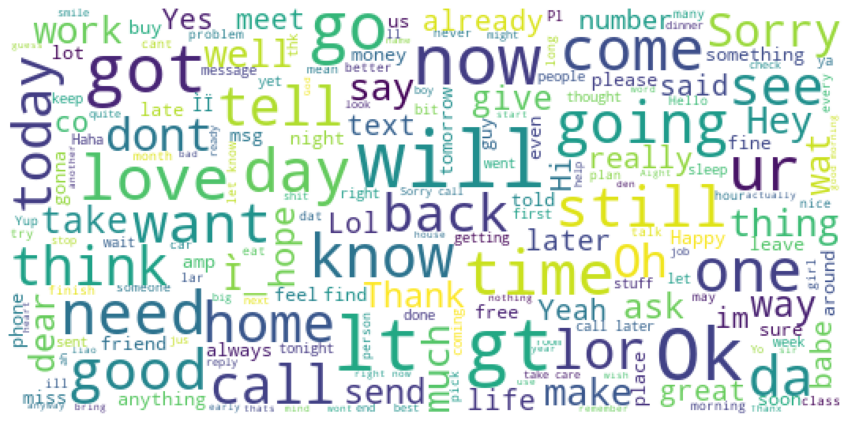

In [ ]:
#WordCloud for Ham messages
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
ham_sms_cloud = WordCloud(width =530, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="white").generate(ham_sms)
plt.figure(figsize=(15,15))
plt.imshow(ham_sms_cloud)
plt.axis('off')
plt.show()

Ham Messages - Messages that are not spam have more words like home, call, ok, will, back e.t.c. 

In [ ]:
#Putting all spam messages into a list and converting it to a string
spam_sms = " ".join(dfspam.SMS.to_numpy().tolist())

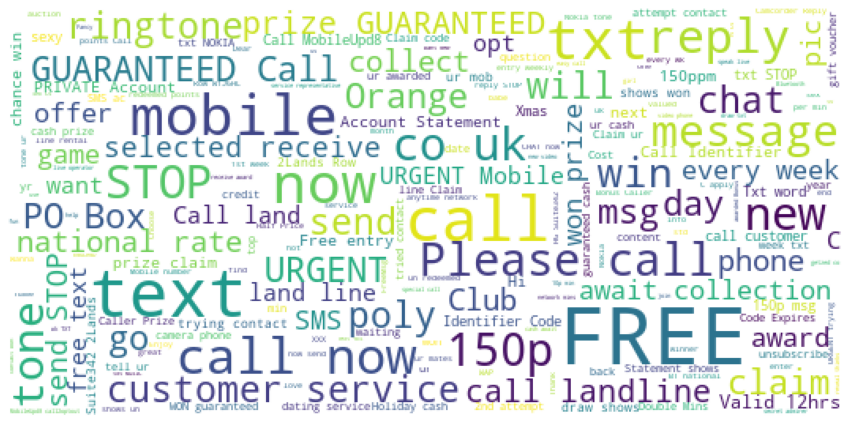

In [ ]:
#WordCloud for Spam messages
spam_sms_cloud = WordCloud(width =530, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="white").generate(spam_sms)
plt.figure(figsize=(15,15))
plt.imshow(spam_sms_cloud)
plt.axis('off')
plt.show()

Spam messages have words like call, please, text, urgent e.t.c a lot. 

## **Balancing the Dataset** 

Because we have unbalanced data

In [ ]:
#We sample ham messages using length of spam messages so that we hae an equal distribution
dfham_sample=dfham.sample(dfspam.shape[0])

In [ ]:
dfham_sample.shape

(747, 4)

In [ ]:
df_balance=pd.concat([dfham_sample,dfspam],axis=0)

In [ ]:
df_balance.shape

(1494, 4)

In [ ]:
#Balanced dataset that has 747 Ham messages and 747 Spam messages. 
df_balance.head()

,Label,SMS,Label_number,length
4588,ham,Have you not finished work yet or something?,0,44
1203,ham,Thanks for understanding. I've been trying to ...,0,61
2242,ham,Nope wif my sis lor... Aft bathing my dog then...,0,96
2338,ham,"Alright, see you in a bit",0,25
3021,ham,How dare you change my ring,0,27


The Balanced dataset is a small dataset to train on. 

## **Text Preprocessing**

Now, we have to clean the text messages we have beofre training. For thism we use NLTK (Natural Language Toolkit). 

We do the following NLP Techniques : 
- Convert all the text into Lower case
- Remove Stopwords 
- Remove any Punctuations
- Perform Stemming 

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
import string
def clean(txt):
    #Convert to lower case
    txt = str(txt).lower()
    #Remove Stopwords
    stopword1 = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    #Remove Punctuations
    punc = [char for char in txt if char not in string.punctuation]
    punc = ''.join(punc)
    clean_stopwords = [word for word in punc.split() if word.lower() not in stopword1]
    cleanwords = ""
    #Stemming using Porter Stemmer
    for x in clean_stopwords:
        cleanwords += (PorterStemmer().stem(x)) + " "
    
    
    return txt

df_balance['clean_sms'] = df['SMS'].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Dataset with cleaned messages
df_balance.head()

,Label,SMS,Label_number,length,clean_sms
4588,ham,Have you not finished work yet or something?,0,44,have you not finished work yet or something?
1203,ham,Thanks for understanding. I've been trying to ...,0,61,thanks for understanding. i've been trying to ...
2242,ham,Nope wif my sis lor... Aft bathing my dog then...,0,96,nope wif my sis lor... aft bathing my dog then...
2338,ham,"Alright, see you in a bit",0,25,"alright, see you in a bit"
3021,ham,How dare you change my ring,0,27,how dare you change my ring


In [ ]:
df_balance.dtypes

Label           object
SMS             object
Label_number     int64
length           int64
clean_sms       object
dtype: object

# **Splitting the Dataset for training and testing**

In [ ]:
#We use cleaned SMS to predict the Label Number 
X=df_balance['clean_sms']
Y=df_balance['Label_number']

In [ ]:
#Splitting the, 80% of the dataset for training, remianing 20% for testing
from sklearn.model_selection import train_test_split
Xtraining, Xtesting, Ytraining, Ytesting = train_test_split(X, Y,test_size=0.20,random_state=1)

In [ ]:
print(Ytraining)

3491    0
3175    0
2809    0
3007    1
3418    1
       ..
5413    0
1049    1
2557    1
1073    0
2266    1
Name: Label_number, Length: 1195, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#Convert SMS Message into a matrix of token counts - using vectorizer
vect = CountVectorizer()
# learn training data vocabulary - fitting the training data 
p=vect.fit(Xtraining)

In [ ]:
#Transforming the Training data into a Document - Term Matrix
X_train = p.transform(Xtraining)
X_train

<1195x4021 sparse matrix of type '<class 'numpy.int64'>'
	with 20115 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train)

  (0, 754)	1
  (0, 806)	1
  (0, 815)	1
  (0, 1066)	1
  (0, 1090)	1
  (0, 1378)	1
  (0, 1732)	1
  (0, 1794)	1
  (0, 1867)	1
  (0, 1902)	1
  (0, 2262)	1
  (0, 2312)	1
  (0, 2468)	1
  (0, 2537)	2
  (0, 2650)	1
  (0, 2895)	1
  (0, 2970)	1
  (0, 3289)	1
  (0, 3792)	1
  (0, 3895)	1
  (0, 3997)	2
  (1, 814)	1
  (1, 867)	1
  (1, 1228)	1
  (1, 1904)	1
  :	:
  (1193, 3536)	1
  (1193, 3550)	1
  (1193, 3558)	1
  (1193, 3680)	1
  (1194, 311)	1
  (1194, 349)	1
  (1194, 621)	2
  (1194, 1225)	1
  (1194, 1235)	1
  (1194, 1549)	1
  (1194, 1552)	1
  (1194, 1724)	1
  (1194, 1732)	1
  (1194, 1751)	1
  (1194, 2065)	1
  (1194, 2129)	1
  (1194, 2625)	1
  (1194, 2703)	1
  (1194, 3169)	1
  (1194, 3522)	1
  (1194, 3536)	1
  (1194, 3597)	1
  (1194, 3858)	1
  (1194, 3937)	1
  (1194, 3957)	1


In [ ]:
vect1 = CountVectorizer()
# learn training data vocabulary
p1=vect1.fit(Xtraining)
#Transforming the testing data into a Document - Term matrix
X_test = p1.transform(Xtesting)
X_test

<299x4021 sparse matrix of type '<class 'numpy.int64'>'
	with 4610 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_test)

  (0, 757)	1
  (0, 804)	1
  (0, 1674)	1
  (0, 1989)	1
  (0, 3709)	1
  (1, 1480)	1
  (1, 2286)	1
  (1, 3545)	1
  (2, 825)	1
  (2, 1030)	1
  (2, 1061)	1
  (2, 1169)	1
  (2, 1208)	1
  (2, 1389)	1
  (2, 1751)	1
  (2, 2485)	1
  (2, 2559)	1
  (2, 2666)	1
  (2, 3129)	1
  (2, 3163)	1
  (2, 3597)	1
  (2, 3694)	1
  (2, 3912)	1
  (2, 3957)	1
  (2, 3997)	1
  :	:
  (297, 2683)	1
  (297, 2792)	1
  (297, 2794)	1
  (297, 3597)	2
  (297, 3904)	1
  (298, 825)	2
  (298, 1456)	1
  (298, 1576)	1
  (298, 1950)	1
  (298, 1965)	1
  (298, 2028)	1
  (298, 2035)	1
  (298, 2129)	1
  (298, 2324)	1
  (298, 2400)	2
  (298, 2525)	1
  (298, 2625)	1
  (298, 2797)	1
  (298, 3289)	1
  (298, 3505)	1
  (298, 3520)	1
  (298, 3536)	1
  (298, 3723)	1
  (298, 3933)	1
  (298, 3946)	2


In [ ]:
#Using TF-IDF (Term Frequency - Inverse Document Frequency) to evaluate the importance of a word to a document
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
q=tfidf_transformer.fit(X_train)
X_train_tfidf = q.transform(X_train)

In [ ]:
tfidf_transformer = TfidfTransformer()
q2=tfidf_transformer.fit(X_test)
X_test_tfidf = q2.transform(X_test)

## **Predictive Models**

**Naive Bayes**

In [ ]:
#Importing Naive Bayes library from sklearn
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#Initializing Naive Bayes
nb=MultinomialNB()

In [ ]:
#Fitting the model with training data
nb.fit(X_train_tfidf, Ytraining)

MultinomialNB()

In [ ]:
#Predictions on the testing data 
nb_pred = nb.predict(X_test_tfidf)

In [ ]:
#predicitons
print(nb_pred)

[0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0
 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1
 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0
 1 1 0]


In [ ]:
#Acuuracy of the trained model 
from sklearn.metrics import accuracy_score
nb_score = accuracy_score(Ytesting, nb_pred)
print(nb_score)


0.9531772575250836


In [ ]:
#Dataframe Real vs predicted values for testing data
pred_dataframe=pd.DataFrame({'Real':Ytesting.ravel(),'Predicted':nb_pred.ravel()})

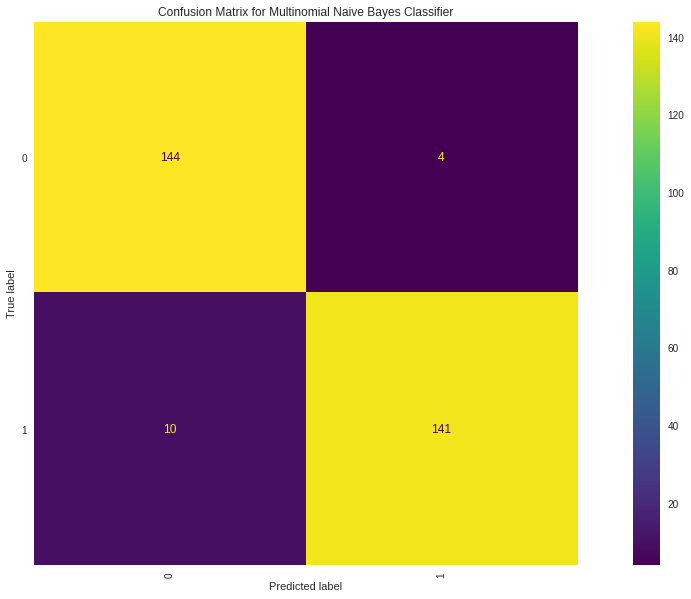

In [ ]:
#Confusion Matrix predicted vs True label
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
fig1,ax1 = plt.subplots(figsize = (20,10))
ax1.set_title("Confusion Matrix for Multinomial Naive Bayes Classifier")
nb_conf = confusion_matrix(pred_dataframe['Real'],pred_dataframe['Predicted'])
nb_display = ConfusionMatrixDisplay(confusion_matrix=nb_conf,display_labels = nb.classes_)
nb_display.plot(xticks_rotation ='vertical',ax=ax1,)
plt.grid(False)
plt.show()

**Logistic Regression**

In [ ]:
#Importing and initializing Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')

In [ ]:
#Fitting training data into the model for learning
lr.fit(X_train_tfidf, Ytraining)

LogisticRegression(solver='liblinear')

In [ ]:
#Predictions on testing data
lr_pred = lr.predict(X_test_tfidf)

In [ ]:
#Predicted values
print(lr_pred)

[0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0
 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1
 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0
 1 1 0]


In [ ]:
#Acuuracy
lr_score = accuracy_score(Ytesting, lr_pred)
print(lr_score)

0.9632107023411371


In [ ]:
#Dataframe Real vs predicted values for testing data
pred_dataframe1=pd.DataFrame({'Real':Ytesting.ravel(),'Predicted':lr_pred.ravel()})

In [ ]:
pred_dataframe1.head()

,Real,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1


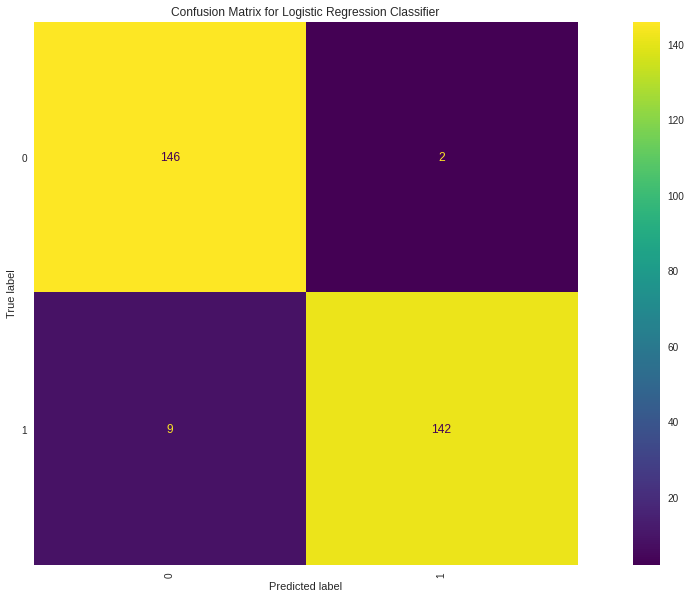

In [ ]:
#Confusion Matrix predicted vs True label
fig1,ax1 = plt.subplots(figsize = (20,10))
ax1.set_title("Confusion Matrix for Logistic Regression Classifier")
lr_conf = confusion_matrix(pred_dataframe1['Real'],pred_dataframe1['Predicted'])
lr_display = ConfusionMatrixDisplay(confusion_matrix=lr_conf,display_labels = lr.classes_)
lr_display.plot(xticks_rotation ='vertical',ax=ax1)
plt.grid(False)
plt.show()

# **Comparing Accuracy**

In [ ]:
#Putting both accuracies into a list
acc_s=[]
acc_s.append(nb_score)
acc_s.append(lr_score)
models=["Naive Bayes", "Logistic Regression"]

We can see that Logistic Regression has slightly higher accuracy than Naive Bayes. Accuracy can be improved if training size is improved 
(we used a small dataset for training - due to unbalanced data)

In [ ]:
#Displaying accuracies
for i in range(len(models)):
  print(models[i]+": "+str(acc_s[i]))

Naive Bayes: 0.9531772575250836
Logistic Regression: 0.9632107023411371


Text(0, 0.5, 'Accuracy')

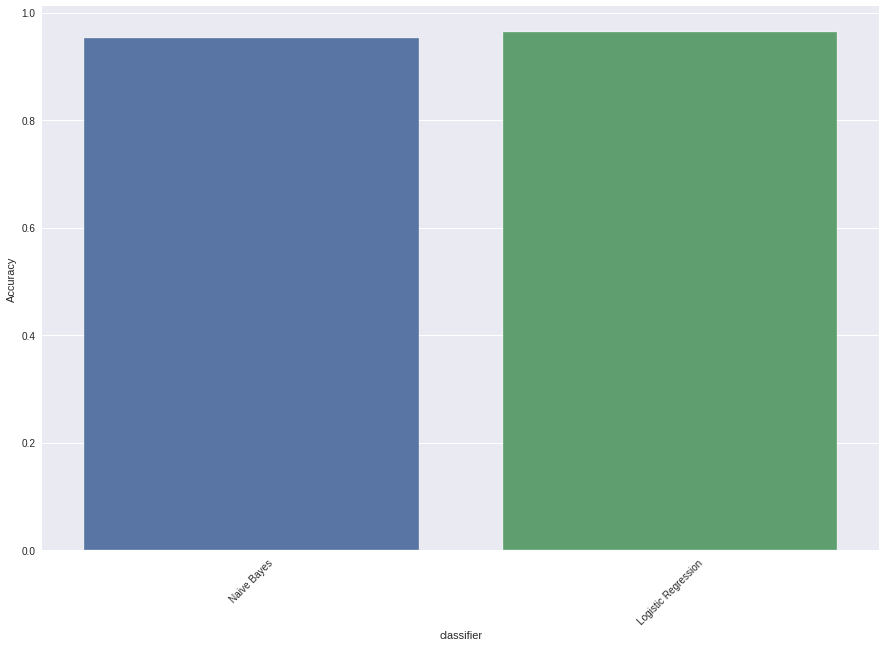

In [ ]:
#Bar Graph of Accuracies
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(y=acc_s,x=models)
plt.xlabel('classifier')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')

## **ROC Curves**

In [ ]:
#Predict class probabilites for every data point in Naive Bayes (infer class probabilites)
prob1=nb.predict_proba(X_test_tfidf)[:,1]

In [ ]:
#Predict class probabilites for every data point in Naive Bayes
prob2=lr.predict_proba(X_test_tfidf)[:,1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

An ROC curve shows the performance of one classification model at all classification thresholds. It can be used to evaluate the strength of a model. ROC Curves can also be used to compare two models.

In [ ]:
#ROC (Receiver Operating Charcteristic) Curve for Naive Bayes - False Positive Rate (1-Speicifity), True Posiitve Rate(Sensitivity), Probabilty threhold (e.g. 0.5)
#to evalaute models 
fpr1, tpr1, thresh1 = roc_curve(Ytesting, prob1, pos_label=1)

In [ ]:
#ROC for Logisitc Regression
fpr2, tpr2, thresh2 = roc_curve(Ytesting, prob2, pos_label=1)

In [ ]:
#ROC Curve at fpr = tpr
random_probs = [0 for i in range(len(Ytesting))]
p_fpr, p_tpr, _ = roc_curve(Ytesting, random_probs, pos_label=1)

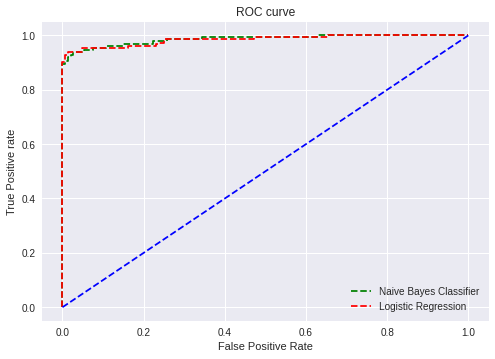

In [ ]:
#Plotting ROC Curve
plt.style.use('seaborn')


plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Naive Bayes Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
#ROC - AUC Scores
print("Naive Bayes Classifier \t\t", roc_auc_score(Ytesting, prob1))
print("Logistic Regression \t\t", roc_auc_score(Ytesting, prob2))

Naive Bayes Classifier 		 0.9855915518167174
Logistic Regression 		 0.9840701628781099


We can see that both the models have similar ROC-AUC Scores. Fine tuning need to be done to improve accuracy. 